In [ ]:
import numpy as np
import pandas as pd


In [ ]:
#this black of code is used for finding the which encodings is used by file and telling that CSV is loaded or not.
import pandas as pd
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = 'mail_data.csv'
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"file successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding: {encoding}")
        continue

if 'df' in locals():
    print("CSV successfully laded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

In [ ]:
df.sample(5)

In [ ]:
df.shape

In [ ]:
"""
1- Data cleaning
2- EDA
3- Text Processing
4- Model Building
5- Evaluation
6- Improvement
7- Website
8- Display
"""

In [ ]:
# DATA CLEANING STARTS FROM HERE

In [ ]:
df.info()

In [ ]:
# this is block is use  to drop or delete the columns.
#df.drop(columns=['Category', 'Message'], inplace=True)

In [ ]:
df.sample(5)

In [ ]:
# this block is used for renaming the columns
df.rename(columns={'Category':'target', 'Message':'text'}, inplace=True) 
df.sample(10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [118]:
df = df.drop_duplicates(keep='first')

In [119]:
df.duplicated().sum()

0

In [120]:
df.shape

(5157, 2)

In [121]:
# EDA START FROM HERE

In [122]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

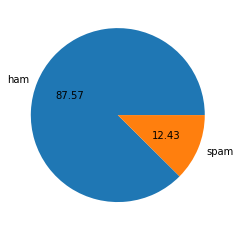

In [124]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [125]:
import nltk

In [126]:
!pip install nltk

In [127]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sachin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [128]:
df['num_characters'] = df['text'].apply(len)

In [129]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [130]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [131]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [132]:
df['num_sentences'] = df['text'].apply(lambda  x:len(nltk.sent_tokenize(x)) )

In [133]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [134]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [135]:
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [136]:
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [137]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

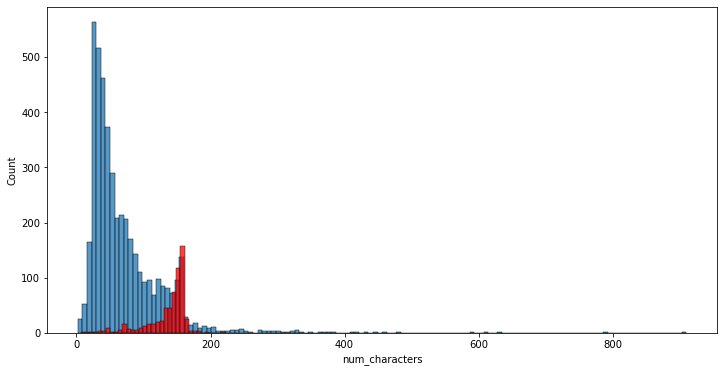

In [138]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

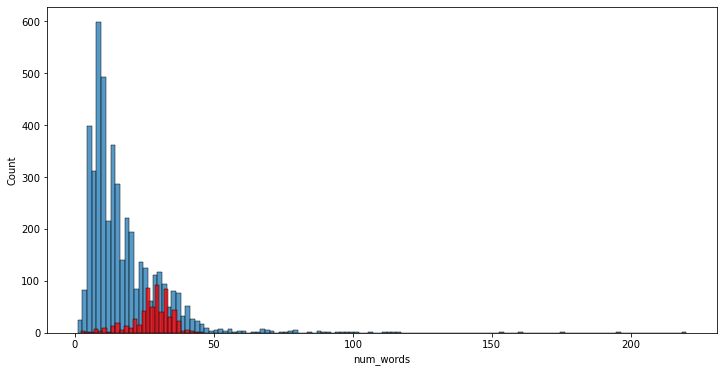

In [139]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

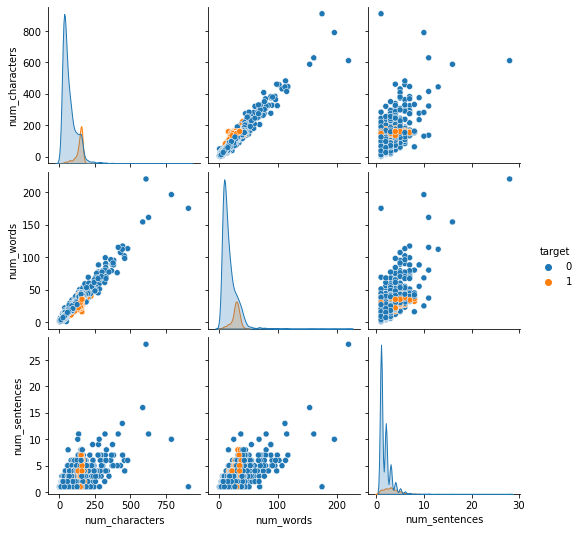

In [140]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

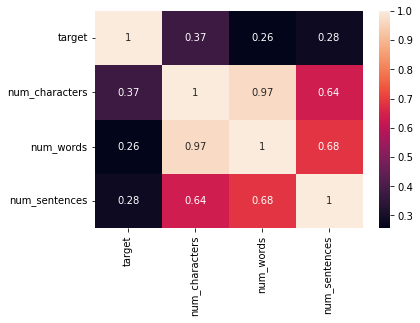

In [141]:
sns.heatmap(df.corr(), annot=True)

In [142]:
# DATA PREPROCESSING STARTS FROM  HERE
'''
- Lower Case
- Tokenization
- Removing Special Characters
- Removing  Stopwords and Puntuations
- Stemming
'''

'\n- Lower Case\n- Tokenization\n- Removing Special Characters\n- Removing  Stopwords and Puntuations\n- Stemming\n'

In [143]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps = PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text=transform_text("I'm gonna be home soon and i don't want to be talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

i gon na be home soon and i do want to be talk about thi stuff anymor tonight k i cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sachin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [145]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [146]:
df['transformed_text'] = df['text'].apply(transform_text)


In [147]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [148]:
!pip install wordcloud

In [149]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [150]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [151]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [152]:
len(spam_corpus)

14218

c:\Users\Sachin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


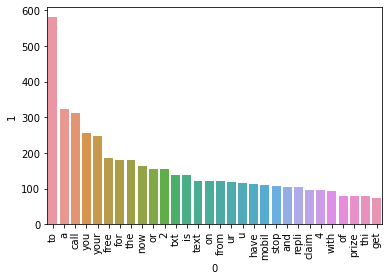

In [153]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [154]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [155]:
len(ham_corpus)

63596

c:\Users\Sachin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


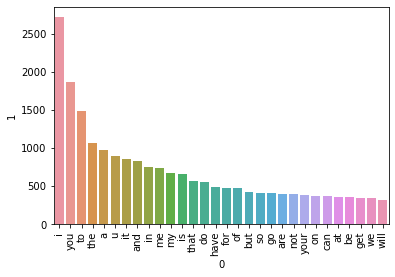

In [156]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [157]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [158]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv =  CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [159]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [160]:
X.shape

(5157, 3000)

In [161]:
y=df['target'].values

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [164]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import  accuracy_score,confusion_matrix,precision_score

In [165]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [166]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.872093023255814
[[793 112]
 [ 20 107]]
0.4885844748858447


In [167]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9699612403100775
[[905   0]
 [ 31  96]]
1.0


In [168]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[904   1]
 [ 16 111]]
0.9910714285714286


In [169]:
!pip install xgboost

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [171]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimator=50, random_state=2)

In [172]:
clfs= {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'Dt':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [173]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [174]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9767441860465116, 0.963963963963964)

In [175]:
accuracy_scores= []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9767441860465116
Precision -  0.963963963963964
For  KN
Accuracy -  0.9137596899224806
Precision -  1.0
For  NB
Accuracy -  0.9699612403100775
Precision -  1.0
For  Dt
Accuracy -  0.939922480620155
Precision -  0.9333333333333333
For  LR
Accuracy -  0.9563953488372093
Precision -  0.9019607843137255
For  RF
Accuracy -  0.9728682170542635
Precision -  1.0
For  AdaBoost
Accuracy -  0.9583333333333334
Precision -  0.875
For  BgC
Accuracy -  0.9709302325581395
Precision -  0.9619047619047619
For  ETC
Accuracy -  0.9767441860465116
Precision -  1.0
For  GBDT
Accuracy -  0.9534883720930233
Precision -  1.0


c:\Users\Sachin\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:15:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


For  xgb
Accuracy -  0.9709302325581395
Precision -  0.9801980198019802


In [176]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [177]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.913760,1.000000
2,NB,0.969961,1.000000
5,RF,0.972868,1.000000
8,ETC,0.976744,1.000000
9,GBDT,0.953488,1.000000
10,xgb,0.970930,0.980198
0,SVC,0.976744,0.963964
7,BgC,0.970930,0.961905
3,Dt,0.939922,0.933333
4,LR,0.956395,0.901961


In [178]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [179]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.913760
1,NB,Accuracy,0.969961
2,RF,Accuracy,0.972868
3,ETC,Accuracy,0.976744
4,GBDT,Accuracy,0.953488
5,xgb,Accuracy,0.970930
6,SVC,Accuracy,0.976744
7,BgC,Accuracy,0.970930
8,Dt,Accuracy,0.939922
9,LR,Accuracy,0.956395


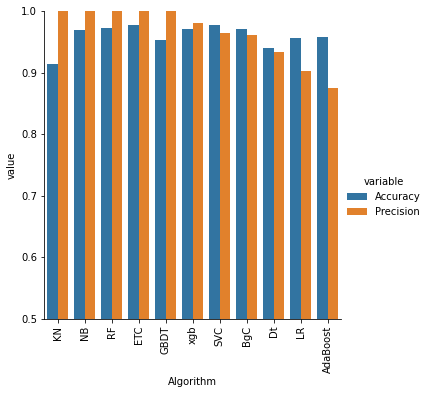

In [180]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [181]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [182]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [183]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [184]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [185]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.913760,1.000000,0.913760,1.000000,0.913760,1.000000,0.913760,1.000000
1,NB,0.969961,1.000000,0.969961,1.000000,0.969961,1.000000,0.969961,1.000000
2,RF,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
3,ETC,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000
4,GBDT,0.953488,1.000000,0.953488,1.000000,0.953488,1.000000,0.953488,1.000000
5,xgb,0.970930,0.980198,0.970930,0.980198,0.970930,0.980198,0.970930,0.980198
6,SVC,0.976744,0.963964,0.976744,0.963964,0.976744,0.963964,0.976744,0.963964
7,BgC,0.970930,0.961905,0.970930,0.961905,0.970930,0.961905,0.970930,0.961905
8,Dt,0.939922,0.933333,0.939922,0.933333,0.939922,0.933333,0.939922,0.933333
9,LR,0.956395,0.901961,0.956395,0.901961,0.956395,0.901961,0.956395,0.901961


In [186]:
svc=SVC(kernel='sigmoid' , gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [187]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [188]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [189]:
y_pred=voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9835271317829457
Precision 1.0


In [190]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [191]:
from sklearn.ensemble import StackingClassifier

In [192]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [193]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(y_test, y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9864341085271318
Precision 0.991304347826087


In [194]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [196]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train=["sample text 1","sample text 2","sample text 3"]
y_train=[0,1,0]

tfidf=TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf=tfidf.fit_transform(X_train)

mnb=MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

with open('vectorizer.pkl','wb' ) as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)